# Data Analysis and Plots for Exploration

The following notebook contains code to analyze and plot data for benzyl chloride hydrolysis. The data is from...

"Changes in mechanism and transition state structure for solvolysis reactions of ring substituted benzyl chlorides in aqueous solution." P.E. Yeary, J.P. Richard, *J. Phys. Org. Chem.*, **2024**, *37*, e4600. https://doi.org/10.1002/poc.4600 

This notebook presents attempts to reproduce the calculations and the plots from the paper.

## Load Data Set

First let us load the data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import uncertainties as un
from uncertainties import unumpy as unp

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Explorations/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

github_location = "data/"
github_location_styles = "~/github/LFER-QSAR/styles/"
github_location_LFER_tables = "~/github/LFER-QSAR/data/"




sigmatype = "s_plus"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################

df1 = pd.read_csv(github_location + "Table_1_2.csv",
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Designation", 
                 comment = "#") 

#df1.insert(3, "Total_Sigma", np.NaN, allow_duplicates = False)     # Insert a column for the total sigma value

display(df1)

,Description,para,sub1,sub2,kobs,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,26.0,13.0,2.0
MeO-1-Cl,MeO-MeO-BnCl,p-OCH3,m-OCH3,H,7.200000e-01,26.0,16.0,1.6
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,16.0,8.2,1.9
m-CN-1-Cl,MeO-CN-BnCl,p-OCH3,m-CN,H,5.900000e-05,8.7,3.8,2.3
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,8.7,3.6,2.4
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,41.0,6.2,6.5
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,82.0,5.5,14.8
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,7.3,3.5,2.1


## Calculated Substituent Parameters 
This table presents the $\sigma$ LFER values calculated according to the method of the authors (I think.)
 The data series are as follows:


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option("display.max_rows", None, "display.max_columns", None)

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################

df2 = pd.read_csv(github_location + "Calculated_sigmas.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

display(df2)

,sigma_n,sigma_r,sigma_I,sigma_R+
Substituent,,,,
p-OCH3,-0.13,-0.66,0.27,-1.02
m-OCH3,0.12,0.00,0.12,0.00
p-CH3,-0.12,-0.20,-0.04,-0.25
m-CH3,-0.07,0.00,-0.07,0.00
p-Br,0.28,-0.14,0.44,-0.30
m-Br,0.39,0.00,0.39,0.00
p-CN,0.66,0.00,0.56,0.00
m-CN,0.56,0.00,0.56,0.00
p-NO2,0.78,0.00,0.65,0.15


## Calculate Total $\sigma$ Values

There are three potential substituents in each molecule in the series. Hammett substituent constants are generally additive (within reason) so we can sum the three $\sigma$ values to create a $\sum\sigma$ value that represent the combined electronic effect of the substituents in diphenylmethylenechloride.

The code below accesses the value of $\sigma$ for each substituent and sums them up to a toyal.  This total is then entered into the dataframe. If one or more of the substituents have no asigned $\sigma$ value (e.g. *ortho*-substituents) then the total is recorded as 'NaN'

In [13]:
####################################################################
### Function to total the sigma values of multiple substituents  
####################################################################

def Total_meta_sigma(row, sigmatype, df1, df2):     # same as above but adds only the meta substituents
    total = 0.
    for sub in ["sub1","sub2"]:   # Change this list to match the columns in the data set
        a = (df1[sub][row])

        if a in df2.index:        # If the index does not have a Hammett sigma value return 'NaN'
            sigma = df2[sigmatype][a]
            total = total + float(sigma)
        else:
            total = np.NaN

    return(total)

def single_sigma(molecule, column, sigmatype, df1, df2):     # same as above but adds only the meta substituents
    total = 0.
    a = df1[column][molecule]  

    if a in df2.index:               # If the index does not have a Hammett sigma value return 'NaN'
        sigma = df2[sigmatype][a]
    else:
        sigma = np.NaN

    return(sigma)



######################################################################
### Create new columns in dataframe - columns must exist before being addressed  in next part
######################################################################

df1.insert(5, "Para_Sigma", np.NaN, allow_duplicates = False)  
df1.insert(5, "Total_meta_Sigma", np.NaN, allow_duplicates = False)     

######################################################################
### calculate combined sigma value for all molecules in dataframe  
######################################################################

for molecule in df1.index:
    df1.loc[molecule,"Total_meta_Sigma"] = Total_meta_sigma(molecule,"sigma_n",df1,df2)
    df1.loc[molecule,"Para_Sigma"] = single_sigma(molecule, "para", "sigma_r",df1,df2)

display(df1)

,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,0.00,-0.66,26.0,13.0,2.0
MeO-1-Cl,MeO-MeO-BnCl,p-OCH3,m-OCH3,H,7.200000e-01,0.12,-0.66,26.0,16.0,1.6
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,0.39,-0.66,16.0,8.2,1.9
m-CN-1-Cl,MeO-CN-BnCl,p-OCH3,m-CN,H,5.900000e-05,0.56,-0.66,8.7,3.8,2.3
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,0.71,-0.66,8.7,3.6,2.4
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,1.10,-0.66,41.0,6.2,6.5
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,1.42,-0.66,82.0,5.5,14.8
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,-0.07,-0.20,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,0.00,-0.20,7.3,3.5,2.1


## Separate data

In the code below we just choop up the data so we have separate series for each *para* substituent

In [14]:
OMe_df = df1.loc[(df1["para"]=="p-OCH3")]
Me_df = df1.loc[(df1["para"]=="p-CH3")]
H_df = df1.loc[(df1["para"]=="H")]
Br_df = df1.loc[(df1["para"]=="p-Br")]
NO2_df = df1.loc[(df1["para"]=="p-NO2")]


## $\sum \sigma_n$ vs $\log{k_{obs}}$

The authors showed separate plots for each set of para-substutents. Only the meta substituents provide the x-axis for the Hammett plots in these cases. We plot each para-substituted series separately on the same plot. Then we select only the rows where $\sum \sigma < 0.75$ for linear line fits for the purpose of calculating the slope.

The plot is saved as a PDF file and the slopes are printed out in this notebook below.

OMe -------------------
slope: -7.83279 +/- 0.57724
intercept: 0.56300 +/- 0.25610
rsq: 0.984
Me -------------------
slope: -3.64108 +/- 0.15801
intercept: -4.11573 +/- 0.06424
rsq: 0.996
H -------------------
slope: -2.43387 +/- 0.12107
intercept: -5.38712 +/- 0.04916
rsq: 0.990
Br -------------------
slope: -2.46670 +/- 0.00000
intercept: -5.65758 +/- 0.00000
rsq: 1.000
NO2 -------------------
slope: -0.83391 +/- 0.00000
intercept: -7.36653 +/- 0.00000
rsq: 1.000


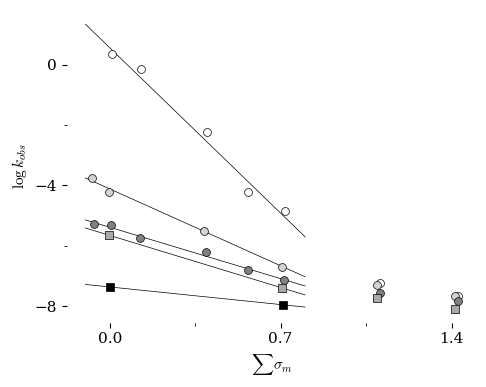

{'p-OCH3': -7.8327914624915165+/-0.2561028871481217, 'p-CH3': -3.6410769294268803+/-0.06423604717453597, 'H': -2.4338668416274962+/-0.04915539347328797, 'p-Br': -2.4667015123883194+/-0, 'p-NO2': -0.8339095358047335+/-0}


In [15]:
import scipy.stats as stats
from scipy.stats import linregress


plt.style.use(github_location_styles + "tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.05, y=.05, tight=True)


df = OMe_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]+0.008   # Also try "Total_Sigma"

ax.scatter(x,y, s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

df = Me_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]-0.005   # Also try "Total_Sigma"
ax.scatter(x,y, s=32, color="lightgray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

df = H_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]+0.005   # Also try "Total_Sigma"
ax.scatter(x,y, s=32, color="gray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

df = Br_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]-0.005   # Also try "Total_Sigma"
ax.scatter(x,y, s=32, color="darkgray", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

df = NO2_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]   # Also try "Total_Sigma"
ax.scatter(x,y, s=32, color="black", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$\sum \sigma_m$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         xticks = [0, 0.7, 1.4],
         yticks = [-8, -4, 0],
         )
ax.set_xticks([0.35,1.05],minor=True)
ax.set_yticks([-6,-2],minor=True)

rho_n_dict = {}

cutoff = .75
x_span = np.linspace(-0.1, cutoff+0.05, 10)

df_trimmed = OMe_df.loc[OMe_df["Total_meta_Sigma"]<cutoff]
#df_trimmed = df_trimmed.loc[df_trimmed["Total_meta_Sigma"]>0.01]   # remove first point
y = np.log10(df_trimmed["kobs"])
x = df_trimmed["Total_meta_Sigma"] 
linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("OMe -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
#display(df_trimmed)
un_slope = un.ufloat(linfit.slope, linfit.intercept_stderr)
rho_n_dict["p-OCH3"] = un_slope


df_trimmed = Me_df.loc[Me_df["Total_meta_Sigma"]<cutoff]
y = np.log10(df_trimmed["kobs"])
x = df_trimmed["Total_meta_Sigma"] 
linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("Me -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
un_slope = un.ufloat(linfit.slope, linfit.intercept_stderr)
rho_n_dict["p-CH3"] = un_slope

df_trimmed = H_df.loc[H_df["Total_meta_Sigma"]<cutoff]
y = np.log10(df_trimmed["kobs"])
x = df_trimmed["Total_meta_Sigma"] 
linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("H -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
un_slope = un.ufloat(linfit.slope, linfit.intercept_stderr)
rho_n_dict["H"] = un_slope

df_trimmed = Br_df.loc[Br_df["Total_meta_Sigma"]<cutoff]
y = np.log10(df_trimmed["kobs"])
x = df_trimmed["Total_meta_Sigma"] 
linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("Br -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
un_slope = un.ufloat(linfit.slope, linfit.intercept_stderr)
rho_n_dict["p-Br"] = un_slope

df_trimmed = NO2_df.loc[NO2_df["Total_meta_Sigma"]<cutoff]
y = np.log10(df_trimmed["kobs"])
x = df_trimmed["Total_meta_Sigma"] 
linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("NO2 -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
#display(df_trimmed)
un_slope = un.ufloat(linfit.slope, linfit.intercept_stderr)
rho_n_dict["p-NO2"] = un_slope

plt.savefig("plots/plot1.pdf")
plt.show()

print(rho_n_dict)

## Curve Fitting the $\sum \sigma_m$ Plot

rather than fit a supposedly linear region at one end of the plot we can treat this system as the addition of two separate rates. The two rate consatnts have different sensitivities to $\sum \sigma_m$. They have different $\rho_n$ values for the mechanisms at the extremes of the plot. This way we can get the best estimate of the true limiting slope at the $\sum \sigma_m = 0$ side of the plot.

OMe -------------------
rho1: -7.84179+/-0.58173 
rho2: -1.11454+/-1.67066 
Me -------------------
rho1: -3.86732+/-0.33459 
rho2: -0.84372+/-0.53744 
H -------------------
rho1: -2.54721+/-0.26203 -5.39004+/-0.05861 
rho2: -0.26693+/-0.67353 -7.45512+/-0.92135
Br -------------------
rho1: -2.50000+/-0.67206 -5.39004+/-0.05861 
rho2: -0.29602+/-1.33322 -7.65046+/-1.87750
NO2 -------------------
slope: -0.83391 +/- 0.00000
intercept: -7.36653 +/- 0.00000
rsq: 1.000


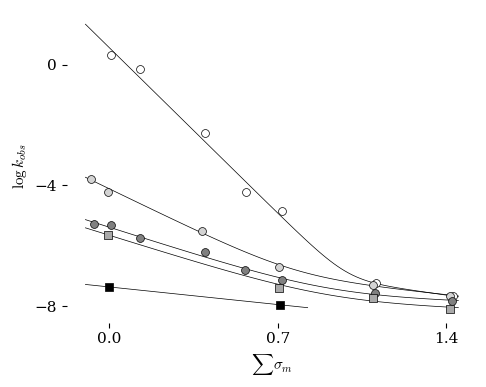

In [16]:
from scipy.optimize import curve_fit
from uncertainties import unumpy as unp
import uncertainties as un

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

def addingHammett2(x, rho1, rho2, int2):
    int1 = np.log10(2.2e-6)
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

x_span = np.linspace(-0.1, 1.45, 100)

plt.style.use(github_location_styles + "tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.05, y=.05, tight=True)

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$\sum \sigma_m$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         xticks = [0, 0.7, 1.4],
         yticks = [-8, -4, 0],
         )

#################################################################
df = OMe_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]

popt, pcov = curve_fit(addingHammett, x, y)
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)

ax.scatter(x+0.008,y, s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fity = addingHammett(x_span, *popt)
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("OMe -------------------")
print(f"rho1: {rho1:0.5f} ")
print(f"rho2: {rho2:0.5f} ")

#################################################################
df = Me_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]

popt, pcov = curve_fit(addingHammett, x, y)
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)

ax.scatter(x-0.005,y, s=32, color="lightgray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fity = addingHammett(x_span, *popt)
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("Me -------------------")
print(f"rho1: {rho1:0.5f} ")
print(f"rho2: {rho2:0.5f} ")

#################################################################
df = H_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]

popt, pcov = curve_fit(addingHammett, x, y)
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)

ax.scatter(x+0.005,y, s=32, color="gray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fity = addingHammett(x_span, *popt)
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("H -------------------")
print(f"rho1: {rho1:0.5f} {int1:0.5f} ")
print(f"rho2: {rho2:0.5f} {int2:0.5f}")

#################################################################
df = Br_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]

popt, pcov = curve_fit(addingHammett2, x, y, p0 = [-2.005,0,-8],
                        bounds = ([-2.5,-1,-9],[-2.0,1,-5]))
[rho1, rho2, int2] = un.correlated_values(popt, pcov)

ax.scatter(x-0.005,y, s=32, color="darkgray", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fity = addingHammett2(x_span, *popt)
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("Br -------------------")
print(f"rho1: {rho1:0.5f} {int1:0.5f} ")
print(f"rho2: {rho2:0.5f} {int2:0.5f}")

#################################################################
df = NO2_df
y = np.log10(df["kobs"])
x = df["Total_meta_Sigma"]

ax.scatter(x,y, s=32, color="black", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)


linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span[0:60], fity[0:60], color='black', zorder=1, linewidth=0.5)
print("NO2 -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
#display(df_trimmed)

plt.savefig("plots/plot2.pdf")
plt.show()





{'p-OCH3': -8.3+/-0, 'p-CH3': -3.6410769294268803+/-0.06423604717453597, 'H': -2.4338668416274962+/-0.04915539347328797, 'p-Br': -2.4667015123883194+/-0, 'p-NO2': -0.8339095358047335+/-0}
df_H_NO2 ----------------------------------------
              Description    para   sub1 sub2          kobs  Total_meta_Sigma  \
Designation                                                                     
NO2-1-Cl     MeO-NO2-BnCl  p-OCH3  m-NO2    H  1.400000e-05              0.71   
NO2-2-Cl      Me-NO2-BnCl   p-CH3  m-NO2    H  2.000000e-07              0.71   
NO2-3-Cl       H-NO2-BnCl       H  m-NO2    H  7.300000e-08              0.71   
NO2-4-Cl      Br-NO2-BnCl    p-Br  m-NO2    H  3.900000e-08              0.71   
NO2-5-Cl     NO2-NO2-BnCl   p-NO2  m-NO2    H  1.100000e-08              0.71   

             Para_Sigma  MeOH/TFE  MeOH/H2O  H_2O/TFE  
Designation                                            
NO2-1-Cl          -0.66       8.7       3.6       2.4  
NO2-2-Cl          -0.20   

,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE,para_p_n.n,para_p_n.s,para_s_n,p_n_s_n
Designation,,,,,,,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,0.0,-0.66,26.0,13.0,2.0,-8.300000,0.000000,-0.13,1.079000
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,0.0,-0.20,7.3,3.5,2.1,-3.641077,0.064236,-0.12,0.436929
3-Cl,H-BnCl,H,H,H,4.900000e-06,0.0,0.00,22.0,7.5,2.9,-2.433867,0.049155,0.00,-0.000000
4-Cl,Br-BnCl,p-Br,H,H,2.200000e-06,0.0,-0.14,22.0,8.4,2.6,-2.466702,0.000000,0.28,-0.690676
5-Cl,NO2-BnCl,p-NO2,H,H,4.300000e-08,0.0,0.00,58.0,8.1,7.2,-0.833910,0.000000,0.78,-0.650449


H-Br -------------------
slope: -4.62520 +/- 1.02531
intercept: -6.49415 +/- 0.40824
rsq: 0.953


,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE,para_p_n.n,para_p_n.s,para_s_n,p_n_s_n
Designation,,,,,,,,,,,,,,
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,0.39,-0.66,16.0,8.2,1.9,-8.300000,0.000000,-0.13,1.079000
Br-2-Cl,Me-Br-BnCl,p-CH3,m-Br,H,3.000000e-06,0.39,-0.20,26.0,6.6,3.9,-3.641077,0.064236,-0.12,0.436929
Br-3-Cl,H-Br-BnCl,H,m-Br,H,6.000000e-07,0.39,0.00,33.0,8.2,4.0,-2.433867,0.049155,0.00,-0.000000


H-NO2 -------------------
slope: -1.90698 +/- 0.42335
intercept: -7.22777 +/- 0.13323
rsq: 0.871


,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE,para_p_n.n,para_p_n.s,para_s_n,p_n_s_n
Designation,,,,,,,,,,,,,,
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,0.71,-0.66,8.7,3.6,2.4,-8.300000,0.000000,-0.13,1.079000
NO2-2-Cl,Me-NO2-BnCl,p-CH3,m-NO2,H,2.000000e-07,0.71,-0.20,52.0,9.4,5.5,-3.641077,0.064236,-0.12,0.436929
NO2-3-Cl,H-NO2-BnCl,H,m-NO2,H,7.300000e-08,0.71,0.00,56.0,7.2,7.8,-2.433867,0.049155,0.00,-0.000000
NO2-4-Cl,Br-NO2-BnCl,p-Br,m-NO2,H,3.900000e-08,0.71,-0.14,47.0,10.1,4.7,-2.466702,0.000000,0.28,-0.690676
NO2-5-Cl,NO2-NO2-BnCl,p-NO2,m-NO2,H,1.100000e-08,0.71,0.00,110.0,6.3,17.0,-0.833910,0.000000,0.78,-0.650449


Br-NO2 -------------------
slope: 1.44703 +/- 0.77756
intercept: -7.30515 +/- 0.27358
rsq: 0.634


,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE,para_p_n.n,para_p_n.s,para_s_n,p_n_s_n
Designation,,,,,,,,,,,,,,
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,1.1,-0.66,41.0,6.2,6.5,-8.300000,0.000000,-0.13,1.079000
"Br,NO2-2-Cl",Me-Br-NO2-BnCl,p-CH3,m-Br,m-NO2,5.100000e-08,1.1,-0.20,61.0,6.9,8.8,-3.641077,0.064236,-0.12,0.436929
"Br,NO2-3-Cl",H-Br-NO2-BnCl,H,m-Br,m-NO2,2.700000e-08,1.1,0.00,77.0,6.3,12.2,-2.433867,0.049155,0.00,-0.000000
"Br,NO2-4-Cl",Br-Br-NO2-BnCl,p-Br,m-Br,m-NO2,1.800000e-08,1.1,-0.14,79.0,6.5,12.2,-2.466702,0.000000,0.28,-0.690676


NO2-NO2 -------------------
slope: 1.66545 +/- 0.74702
intercept: -7.59495 +/- 0.26284
rsq: 0.713


,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE,para_p_n.n,para_p_n.s,para_s_n,p_n_s_n
Designation,,,,,,,,,,,,,,
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,1.42,-0.66,82.0,5.5,14.8,-8.300000,0.000000,-0.13,1.079000
di-NO2-2-Cl,Me-NO2-NO2-BnCl,p-CH3,m-NO2,m-NO2,2.200000e-08,1.42,-0.20,82.0,5.8,14.1,-3.641077,0.064236,-0.12,0.436929
di-NO2-3-Cl,H-NO2-NO2-BnCl,H,m-NO2,m-NO2,1.500000e-08,1.42,0.00,111.0,5.1,22.0,-2.433867,0.049155,0.00,-0.000000
di-NO2-4-Cl,Br-NO2-NO2-BnCl,p-Br,m-NO2,m-NO2,8.300000e-09,1.42,-0.14,84.0,6.4,13.1,-2.466702,0.000000,0.28,-0.690676


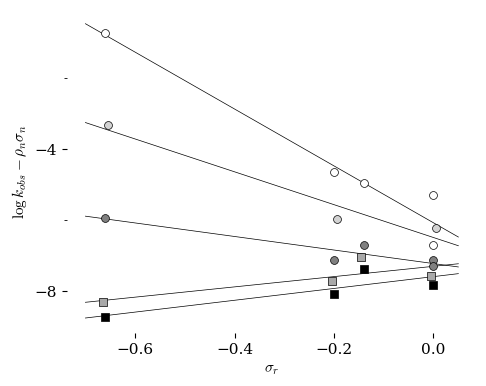

             sigma_n  sigma_r  sigma_I  sigma_R+
Substituent                                     
p-OCH3         -0.13    -0.66     0.27     -1.02
m-OCH3          0.12     0.00     0.12      0.00
p-CH3          -0.12    -0.20    -0.04     -0.25
m-CH3          -0.07     0.00    -0.07      0.00
p-Br            0.28    -0.14     0.44     -0.30
m-Br            0.39     0.00     0.39      0.00
p-CN            0.66     0.00     0.56      0.00
m-CN            0.56     0.00     0.56      0.00
p-NO2           0.78     0.00     0.65      0.15
m-NO2           0.71     0.00     0.71      0.00
H               0.00     0.00     0.00      0.00


In [17]:

#df1 = df1.loc[df1["para"]!="p-NO2"]   # remove p-H series
rho_n_dict["p-OCH3"] = un.ufloat(-8.3,0)

df_H_H = df1.loc[df1["Total_meta_Sigma"]==0.0]
df_H_Br = df1.loc[df1["Total_meta_Sigma"]==0.39]
df_H_NO2 = df1.loc[df1["Total_meta_Sigma"]==0.71]
df_Br_NO2 = df1.loc[df1["Total_meta_Sigma"]==1.1]
df_NO2_NO2 = df1.loc[df1["Total_meta_Sigma"]==1.42]

total_sigma_list= [0, 0.39, 0.71, 1.1, 1.42]
print(rho_n_dict)


import scipy.stats as stats
from scipy.stats import linregress


plt.style.use(github_location_styles + "tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.05, y=.05, tight=True)

print("df_H_NO2 ----------------------------------------")
print(df_H_NO2)
print("-------------------------------------------------\n\n")


ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}} -\rho_n \sigma_n$", 
          xlabel=r"$\sigma_r$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
#         xticks = [0, 0.7, 1.4],
         yticks = [-8, -4, 0],
         )
ax.set_xticks([0.35,1.05],minor=True)
ax.set_yticks([-6,-2],minor=True)



cutoff = .75
x_span = np.linspace(-0.7, 0.05, 10)

#################################################
df = df_H_H.copy()

df["para_p_n.n"] = np.NaN   # nominal value of rho_n
df["para_p_n.s"] = np.NaN   # st_derr value of rho_n
df["para_s_n"] = np.NaN
df["p_n_s_n"] = np.NaN

for each in df["para"]:
    df.loc[(df["para"]==each), "para_p_n.n"] = rho_n_dict[each].n
    df.loc[(df["para"]==each), "para_p_n.s"] = rho_n_dict[each].s
    df.loc[(df["para"]==each), "para_s_n"] = df2["sigma_n"][each]
df["p_n_s_n"] = df["para_p_n.n"] * df["para_s_n"]


y = np.log10(df["kobs"]) - df["p_n_s_n"]
x = df["Para_Sigma"]
ax.scatter(x,y, s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("H-H -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
display(df)

#################################################
df = df_H_Br.copy()

df["para_p_n.n"] = np.NaN   # nominal value of rho_n
df["para_p_n.s"] = np.NaN   # st_derr value of rho_n
df["para_s_n"] = np.NaN
df["p_n_s_n"] = np.NaN

for each in df["para"]:
    df.loc[(df["para"]==each), "para_p_n.n"] = rho_n_dict[each].n
    df.loc[(df["para"]==each), "para_p_n.s"] = rho_n_dict[each].s
    df.loc[(df["para"]==each), "para_s_n"] = df2["sigma_n"][each]
df["p_n_s_n"] = df["para_p_n.n"] * df["para_s_n"]


y = np.log10(df["kobs"]) - df["p_n_s_n"]
x = df["Para_Sigma"]
ax.scatter(x+0.005,y, s=32, color="lightgray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("H-Br -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
display(df)


#################################################
df = df_H_NO2.copy()

df["para_p_n.n"] = np.NaN   # nominal value of rho_n
df["para_p_n.s"] = np.NaN   # st_derr value of rho_n
df["para_s_n"] = np.NaN
df["p_n_s_n"] = np.NaN

for each in df["para"]:
    df.loc[(df["para"]==each), "para_p_n.n"] = rho_n_dict[each].n
    df.loc[(df["para"]==each), "para_p_n.s"] = rho_n_dict[each].s
    df.loc[(df["para"]==each), "para_s_n"] = df2["sigma_n"][each]
df["p_n_s_n"] = df["para_p_n.n"] * df["para_s_n"]


y = np.log10(df["kobs"]) - df["p_n_s_n"]
x = df["Para_Sigma"]
ax.scatter(x,y, s=32, color="gray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("H-NO2 -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
display(df)


#################################################
df = df_Br_NO2.copy()

df["para_p_n.n"] = np.NaN   # nominal value of rho_n
df["para_p_n.s"] = np.NaN   # st_derr value of rho_n
df["para_s_n"] = np.NaN
df["p_n_s_n"] = np.NaN

for each in df["para"]:
    df.loc[(df["para"]==each), "para_p_n.n"] = rho_n_dict[each].n
    df.loc[(df["para"]==each), "para_p_n.s"] = rho_n_dict[each].s
    df.loc[(df["para"]==each), "para_s_n"] = df2["sigma_n"][each]
df["p_n_s_n"] = df["para_p_n.n"] * df["para_s_n"]


y = np.log10(df["kobs"]) - df["p_n_s_n"]
x = df["Para_Sigma"]
ax.scatter(x-0.005,y, s=32, color="darkgray", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("Br-NO2 -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
display(df)


#################################################
df = df_NO2_NO2.copy()

df["para_p_n.n"] = np.NaN   # nominal value of rho_n
df["para_p_n.s"] = np.NaN   # st_derr value of rho_n
df["para_s_n"] = np.NaN
df["p_n_s_n"] = np.NaN

for each in df["para"]:
    df.loc[(df["para"]==each), "para_p_n.n"] = rho_n_dict[each].n
    df.loc[(df["para"]==each), "para_p_n.s"] = rho_n_dict[each].s
    df.loc[(df["para"]==each), "para_s_n"] = df2["sigma_n"][each]
df["p_n_s_n"] = df["para_p_n.n"] * df["para_s_n"]


y = np.log10(df["kobs"]) - df["p_n_s_n"]
x = df["Para_Sigma"]
ax.scatter(x,y, s=32, color="black", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)
print("NO2-NO2 -------------------")
print(f"slope: {linfit.slope:0.5f} +/- {linfit.stderr:0.5f}")
print(f"intercept: {linfit.intercept:0.5f} +/- {linfit.intercept_stderr:0.5f}")
print(f"rsq: {linfit.rvalue**2:0.3f}")
display(df)

plt.savefig("plots/plot4.pdf")
plt.show()

print(df2)


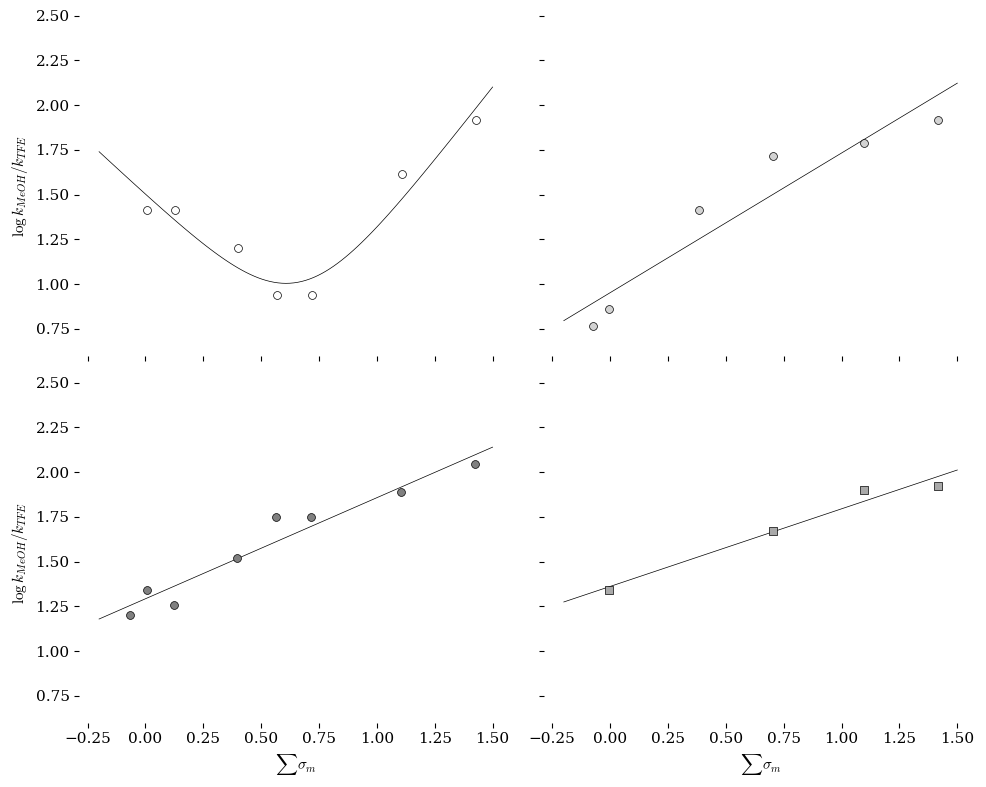

,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,0.00,-0.66,26.0,13.0,2.0
MeO-1-Cl,MeO-MeO-BnCl,p-OCH3,m-OCH3,H,7.200000e-01,0.12,-0.66,26.0,16.0,1.6
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,0.39,-0.66,16.0,8.2,1.9
m-CN-1-Cl,MeO-CN-BnCl,p-OCH3,m-CN,H,5.900000e-05,0.56,-0.66,8.7,3.8,2.3
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,0.71,-0.66,8.7,3.6,2.4
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,1.10,-0.66,41.0,6.2,6.5
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,1.42,-0.66,82.0,5.5,14.8
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,-0.07,-0.20,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,0.00,-0.20,7.3,3.5,2.1


In [41]:
OMe_df = df1.loc[(df1["para"]=="p-OCH3")]
Me_df = df1.loc[(df1["para"]=="p-CH3")]
H_df = df1.loc[(df1["para"]=="H")]
Br_df = df1.loc[(df1["para"]=="p-Br")]
NO2_df = df1.loc[(df1["para"]=="p-NO2")]

import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)




x_span = np.linspace(-0.2, 1.5, 100)



plt.style.use(github_location_styles + "tufte.mplstyle")        
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.margins(x=.05, y=.05, tight=True)

############################################################################

df = OMe_df
y = np.log10(df["MeOH/TFE"])
x = df["Total_meta_Sigma"]+0.008   # Also try "Total_Sigma"

ax[0][0].scatter(x,y, s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

popt, pcov = curve_fit(addingHammett, x, y)
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)
fity = addingHammett(x_span, *popt)
ax[0][0].plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

############################################################################

df = Me_df
y = np.log10(df["MeOH/TFE"])
x = df["Total_meta_Sigma"]-0.005   # Also try "Total_Sigma"
ax[0][1].scatter(x,y, s=32, color="lightgray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax[0][1].plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

############################################################################


df = H_df
y = np.log10(df["MeOH/TFE"])
x = df["Total_meta_Sigma"]+0.005   # Also try "Total_Sigma"
ax[1][0].scatter(x,y, s=32, color="gray", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax[1][0].plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

############################################################################


df = Br_df
y = np.log10(df["MeOH/TFE"])
x = df["Total_meta_Sigma"]-0.005   # Also try "Total_Sigma"
ax[1][1].scatter(x,y, s=32, color="darkgray", marker='s', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

linfit = linregress(x,y)
fity = linfit.slope * x_span + linfit.intercept
ax[1][1].plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

############################################################################


ax[0][0].set(
          ylabel=r"$\log{k_{MeOH}/k_{TFE}}$", 
          xlabel=r"",                
#          xlim=[-.9,.9],                  
          ylim=[0.6,2.5],
#         xticks = [0, 0.7, 1.4],
         xticklabels = [],
#         yticks = [-8, -4, 0],
         )
ax[0][1].set(
          ylabel=r"", 
          xlabel=r"",                
#          xlim=[-.9,.9],                  
          ylim=[0.6,2.5],
#         xticks = [0, 0.7, 1.4],
         xticklabels = [],
#         yticks = [-8, -4, 0],
         yticklabels = [],

         )
ax[1][0].set(
          ylabel=r"$\log{k_{MeOH}/k_{TFE}}$", 
          xlabel=r"$\sum \sigma_m$",                
#          xlim=[-.9,.9],                  
          ylim=[0.6,2.5],
#         xticks = [0, 0.7, 1.4],
#         yticks = [-8, -4, 0],
         )
ax[1][1].set(
          ylabel=r"", 
          xlabel=r"$\sum \sigma_m$",                
#          xlim=[-.9,.9],                  
          ylim=[0.6,2.5],
#         xticks = [0, 0.7, 1.4],
#         yticks = [-8, -4, 0],
         yticklabels = [],

         )
#ax.set_xticks([0.35,1.05],minor=True)
#ax.set_yticks([-6,-2],minor=True)

plt.savefig("plots/plot6.pdf")
plt.show()

df1

In [18]:
df2["sigma_n"]["p-OCH3"]

-0.13